In [100]:
import sys
import traceback
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xarray as xr
import scipy.stats as stats
from metpy.cbook import get_test_data
import netCDF4 as nc  

import pyOptimalEstimation as pyOE

%matplotlib inline
sns.set(style='ticks', palette='deep')


sys.path.append('lib')
import nonScatMWRadTran
import supporting_routines

In [101]:
prior = xr.open_dataset("E:/SAMEER/pyOptimalEstimation_examples-master/pyOptimalEstimation_examples-master/data/SRINAGAR_IGRA.nc", engine='netcdf4')
prior

<xarray.Dataset>
Dimensions:   (time: 8435, height: 20)
Coordinates:
  * time      (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-05-01T14:00:00
  * height    (height) float64 0.0 711.9 1.575e+03 ... 7.351e+03 7.386e+03
Data variables:
    temp      (time, height) float64 ...
    q         (time, height) float64 ...
    bar_pres  (time, height) float64 ...

In [102]:
prior.bar_pres

<xarray.DataArray 'bar_pres' (time: 8435, height: 20)>
[168700 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-05-01T14:00:00
  * height   (height) float64 0.0 711.9 1.575e+03 ... 7.351e+03 7.386e+03
Attributes:
    long_name:  Pressure in Pa
    units:      Pa

In [103]:


import pandas as pd

# Assuming new_df is your DataFrame with a column named 'time'

# Convert the DataFrame to a table format
# table1 = pd.DataFrame({'time': prior['time']})
table1= pd.DataFrame (prior.bar_pres)

# Display the table

print(table1)
table1

           0        1        2        3        4        5        6        7   \
0     84700.0  79100.0  73300.0  70000.0  68400.0  63700.0  60000.0  56000.0   
1     84400.0  70000.0  63800.0  61100.0  60000.0  50000.0  40000.0  30000.0   
2     84500.0  80000.0  70000.0  60000.0  58300.0  50000.0  40000.0  30000.0   
3     70000.0  62900.0  60000.0  50000.0  40000.0  37700.0  30300.0  30000.0   
4     84200.0  70000.0  62900.0  60000.0  50000.0  40000.0  37700.0  30300.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
8430  84600.0  83400.0  82000.0  81500.0  79500.0  77200.0  75900.0  72600.0   
8431  84800.0  84700.0  84400.0  84100.0  83900.0  82700.0  81800.0  81300.0   
8432  84500.0  82400.0  81000.0  80800.0  79300.0  78300.0  76000.0  74700.0   
8433  84600.0  70000.0  50000.0  40000.0  30000.0  25000.0      NaN      NaN   
8434  84500.0  83000.0  80100.0  79800.0  78800.0  76800.0  75600.0  74400.0   

           8        9        10       1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,84700.0,79100.0,73300.0,70000.0,68400.0,63700.0,60000.0,56000.0,50000.0,47800.0,40000.0,30000.0,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,84400.0,70000.0,63800.0,61100.0,60000.0,50000.0,40000.0,30000.0,27000.0,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,84500.0,80000.0,70000.0,60000.0,58300.0,50000.0,40000.0,30000.0,26400.0,25000.0,21300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,70000.0,62900.0,60000.0,50000.0,40000.0,37700.0,30300.0,30000.0,25000.0,24400.0,21200.0,20000.0,18500.0,17500.0,NaN,NaN,NaN,NaN,NaN,NaN
4,84200.0,70000.0,62900.0,60000.0,50000.0,40000.0,37700.0,30300.0,30000.0,25000.0,24400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8430,84600.0,83400.0,82000.0,81500.0,79500.0,77200.0,75900.0,72600.0,70400.0,70000.0,67100.0,65200.0,59200.0,53400.0,50000.0,49400.0,46700.0,43400.0,40700.0,40000.0
8431,84800.0,84700.0,84400.0,84100.0,83900.0,82700.0,81800.0,81300.0,80600.0,79700.0,79100.0,77700.0,75500.0,73700.0,71600.0,70000.0,69700.0,69200.0,68400.0,56900.0
8432,84500.0,82400.0,81000.0,80800.0,79300.0,78300.0,76000.0,74700.0,73100.0,70000.0,64200.0,61800.0,61600.0,59600.0,58500.0,57400.0,56200.0,55500.0,53700.0,53100.0
8433,84600.0,70000.0,50000.0,40000.0,30000.0,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


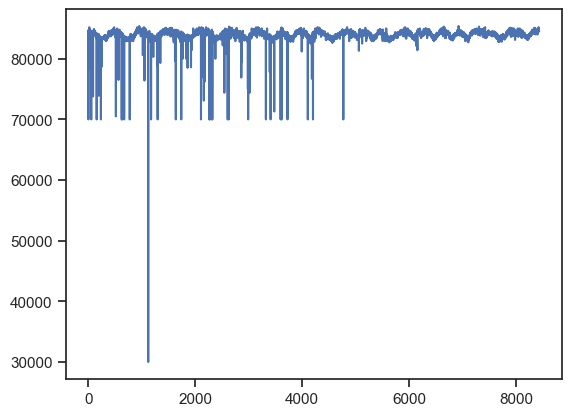

In [104]:
plt.plot(table1[0])

In [105]:
prior.q

<xarray.DataArray 'q' (time: 8435, height: 20)>
[168700 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-05-01T14:00:00
  * height   (height) float64 0.0 711.9 1.575e+03 ... 7.351e+03 7.386e+03
Attributes:
    long_name:  Relative humidity
    units:      %

In [106]:
prior.temp

<xarray.DataArray 'temp' (time: 8435, height: 20)>
[168700 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-05-01T14:00:00
  * height   (height) float64 0.0 711.9 1.575e+03 ... 7.351e+03 7.386e+03
Attributes:
    long_name:  temperature
    units:      K

In [107]:
import pandas as pd

# Specify the path to your CSV file with escaped backslashes
csv_file_path = "C:\\Users\\angsh\\Downloads\\SRINAGAR_IGRA_DATES.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df)


             Test_time
0     01-01-2000 00:00
1     02-01-2000 12:00
2     03-01-2000 00:00
3     04-01-2000 00:00
4     04-01-2000 12:00
...                ...
8430  28-12-2023 12:00
8431  29-12-2023 00:00
8432  29-12-2023 12:00
8433  30-12-2023 00:00
8434  30-12-2023 12:00

[8435 rows x 1 columns]


In [108]:
import pandas as pd
import xarray as xr

# Read the CSV file into a pandas DataFrame
csv_file_path = "C:\\Users\\angsh\\Downloads\\SRINAGAR_IGRA_DATES.csv"
df = pd.read_csv(csv_file_path)

# Convert the 'Test_time' column to datetime64
df['Test_time'] = pd.to_datetime(df['Test_time'], format='%d-%m-%Y %H:%M')

# Assuming you have already loaded your data into prior
# prior: xarray.Dataset

# Make sure that df is sorted by 'Test_time'
df = df.sort_values(by='Test_time')

# If 'time' is already a coordinate in prior and you want to replace its values,
# you can use the .assign_coords() method instead of direct assignment:
prior = prior.assign_coords(time=df['Test_time'])
# prior = prior.assign_coords(time=df.index)
prior = prior.assign_coords(height=prior.height)


# Now the 'time' coordinate in prior has been replaced with the 'Test_time' values from df
prior

<xarray.Dataset>
Dimensions:   (time: 8435, height: 20)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 ... 2023-12-30T12:00:00
  * height    (height) float64 0.0 711.9 1.575e+03 ... 7.351e+03 7.386e+03
Data variables:
    temp      (time, height) float64 ...
    q         (time, height) float64 ...
    bar_pres  (time, height) float64 8.47e+04 7.91e+04 ... 5.23e+04 5.07e+04

In [109]:
import pandas as pd

# Assuming new_df is your DataFrame with a column named 'time'

# Convert the DataFrame to a table format
table = pd.DataFrame({'time': prior['time']})

# Display the table

print(table)
table

                    time
0    2000-01-01 00:00:00
1    2000-01-02 12:00:00
2    2000-01-03 00:00:00
3    2000-01-04 00:00:00
4    2000-01-04 12:00:00
...                  ...
8430 2023-12-28 12:00:00
8431 2023-12-29 00:00:00
8432 2023-12-29 12:00:00
8433 2023-12-30 00:00:00
8434 2023-12-30 12:00:00

[8435 rows x 1 columns]


,time
0,2000-01-01 00:00:00
1,2000-01-02 12:00:00
2,2000-01-03 00:00:00
3,2000-01-04 00:00:00
4,2000-01-04 12:00:00
...,...
8430,2023-12-28 12:00:00
8431,2023-12-29 00:00:00
8432,2023-12-29 12:00:00
8433,2023-12-30 00:00:00


In [110]:
prior.time

<xarray.DataArray 'time' (time: 8435)>
array(['2000-01-01T00:00:00.000000000', '2000-01-02T12:00:00.000000000',
       '2000-01-03T00:00:00.000000000', ..., '2023-12-29T12:00:00.000000000',
       '2023-12-30T00:00:00.000000000', '2023-12-30T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2023-12-30T12:00:00

In [111]:
prior.q

<xarray.DataArray 'q' (time: 8435, height: 20)>
[168700 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2023-12-30T12:00:00
  * height   (height) float64 0.0 711.9 1.575e+03 ... 7.351e+03 7.386e+03
Attributes:
    long_name:  Relative humidity
    units:      %

In [112]:
# import pandas as pd

# # Assuming 'table' is your DataFrame with a column named 'time'

# # Step 1: Get unique dates
# unique_dates = table['time'].unique()

# # Step 2: Randomly select 5 unique dates
# random_dates = pd.Series(unique_dates).sample(n=8, random_state=42)  # Set random_state for reproducibility

# print(random_dates)


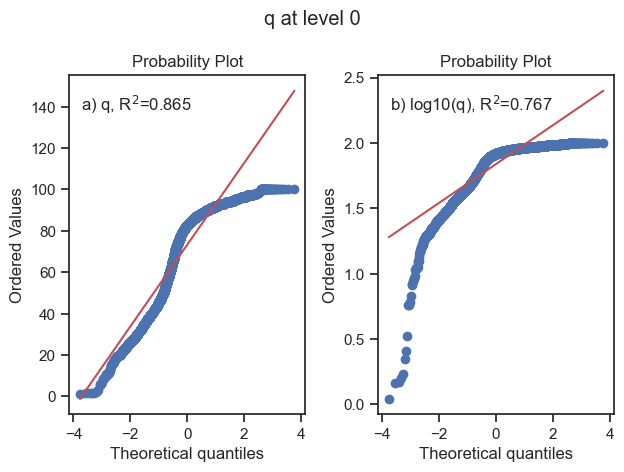

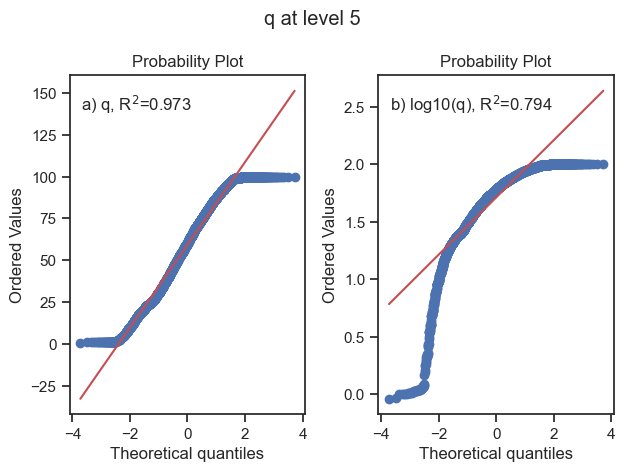

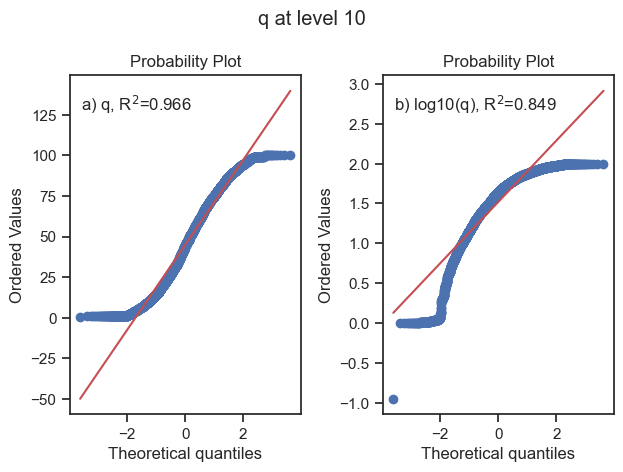

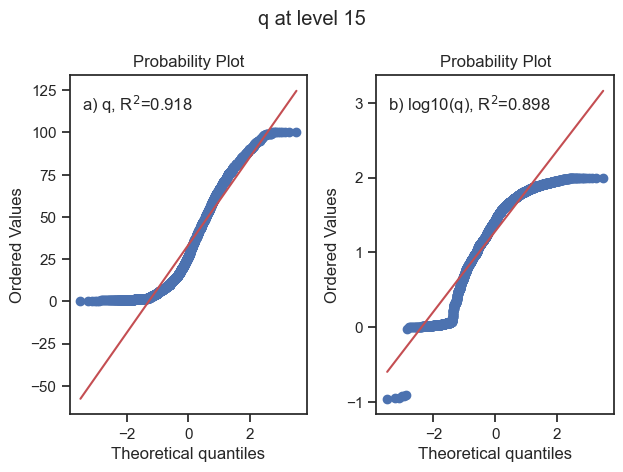

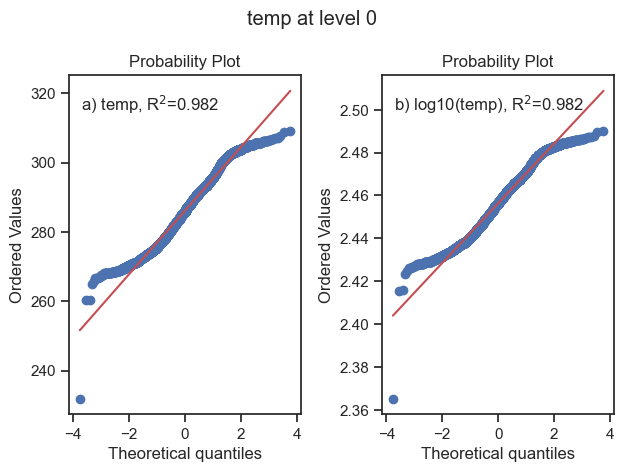

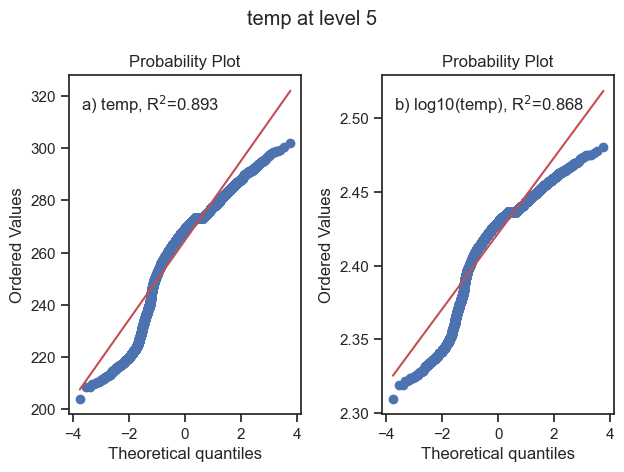

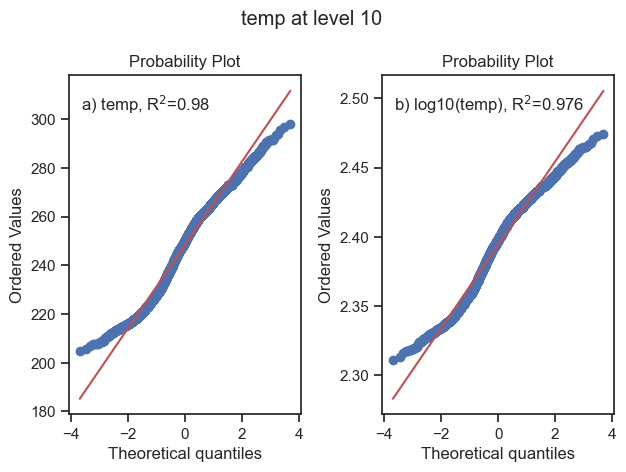

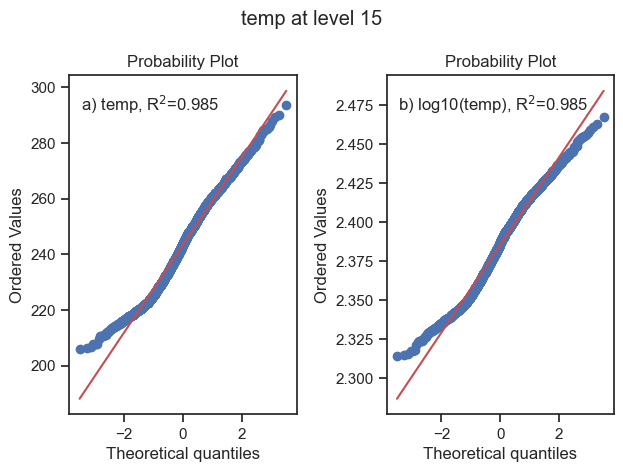

In [113]:
for var in ['q', 'temp']:
    for h in range(0, 20, 5):
        fig, (ax, ax1) = plt.subplots(ncols=2)
        plt.suptitle('%s at level %i' % (var,h))
        (osm, osr), (slope, intercept, r) = stats.probplot(
            prior[var].isel(height=h).dropna('time').values,
            dist="norm",
            plot=ax,
            fit=True,
            rvalue=False)
        ax.text(
            0.05,
            0.95,
            '%s) %s, R$^2$=%.3g' % ('a', var, r**2),
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax.transAxes)

        (osm, osr), (slope, intercept, r) = stats.probplot(
            np.log10(prior[var].isel(height=h).dropna('time').values),
            dist="norm",
            plot=ax1,
            fit=True,
            rvalue=False)
        ax1.text(
            0.05,
            0.95,
            '%s) %s, R$^2$=%.3g' % ('b', 'log10(%s)'%var, r**2),
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax1.transAxes)
        fig.tight_layout()

In [114]:
import numpy as np
import pandas as pd

# Assuming 'prior' is your pandas DataFrame
prior['q'] = np.log10(prior['q'])



In [115]:
prior['q']

<xarray.DataArray 'q' (time: 8435, height: 20)>
array([[1.94724755, 1.89035061, 1.6679208 , ...,        nan,        nan,
               nan],
       [1.60312598, 1.41313445, 1.31362623, ...,        nan,        nan,
               nan],
       [1.96036915, 1.74334853, 1.45548434, ...,        nan,        nan,
               nan],
       ...,
       [1.7870942 , 1.65650022, 1.59128787, ..., 1.16253239, 1.18832667,
        1.18386361],
       [1.99035821, 1.35418353, 1.83948659, ...,        nan,        nan,
               nan],
       [1.81854768, 1.69055096, 1.58858527, ..., 1.54808827, 1.70046677,
        1.61522464]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2023-12-30T12:00:00
  * height   (height) float64 0.0 711.9 1.575e+03 ... 7.351e+03 7.386e+03
Attributes:
    long_name:  Relative humidity
    units:      %

In [116]:
profileTT = np.array([
    '2018-11-24T12:00:00.000000000', '2009-04-10T00:00:00.000000000',
    '2023-09-27T00:00:00.000000000', '2011-07-22T00:00:00.000000000',
     ],dtype='datetime64[ns]')
profiles = prior.sel(time=profileTT)
prior = prior.drop_sel(time=profileTT)
nLev = len(prior.height)
nLev

# 02-02-2000 00:00
# 02-02-2000 12:00
# 03-02-2000 00:00
# 03-02-2000 12:00
# 04-02-2000 00:00
# 04-02-2000 12:00
# 05-02-2000 00:00
# 05-02-2000 12:00

#    2008-10-14 00:00:00
#   2004-05-29 12:00:00
#   2015-09-21 12:00:00
#   2000-07-22 12:00:00
#    2000-06-13 12:00:00
#      2018-03-10 12:00:00
# 2008-08-14 12:00:00 

# '2008-08-14T12:00:00.000000000',


# profileTT = np.array([
#     '2017-12-21T12:00:00.000000000', '2004-05-23T00:00:00.000000000',
#    '2001-06-06T12:00:00.000000000', '2011-11-03T00:00:00.000000000',
#      ],dtype='datetime64[ns]')

20

In [117]:
priors = {'all': prior}

seasons = [
    'DJF',
    'MAM',
    'JJA',
    'SON',
]
months = (
    [12, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10, 11],
)
for season, month in zip(seasons, months):
    priors[season] = prior.where(
        np.in1d(prior['time.month'], month)[:, np.newaxis]).dropna(
            'time', how='all')

In [118]:
# prior_qts = {}
# for season in priors.keys():
#     prior_q = priors[season]['q'].to_pandas()
#     prior_q.columns = ['%05i_q' % (i) for i in prior_q.columns]
#     prior_t = priors[season]['temp'].to_pandas()
#     prior_t.columns = ['%05i_t' % (i) for i in prior_t.columns]
#     prior_qts[season] = pd.concat((prior_q, prior_t), axis=1)
#     prior_qts[season] = prior_qts[season].reindex(
#         sorted(prior_qts[season].columns), axis=1)

# prior_qts

prior_qts = {}
for season in priors.keys():
    prior_q = priors[season]['q'].to_pandas()
    prior_q.columns = ['%05i_q' % (i) for i in prior_q.columns]
    prior_t = priors[season]['temp'].to_pandas()
    prior_t.columns = ['%05i_t' % (i) for i in prior_t.columns]
    prior_qts[season] = pd.concat((prior_q, prior_t), axis=1)
    prior_qts[season] = prior_qts[season].reindex(
        sorted(prior_qts[season].columns), axis=1)

prior_qts

{'all':                       00000_q  00000_t   00711_q  00711_t   01574_q  01574_t  \
 time                                                                           
 2000-01-01 00:00:00  1.947248   268.45  1.890351   275.55  1.667921   271.85   
 2000-01-02 12:00:00  1.603126   283.55  1.413134   278.15  1.313626   273.15   
 2000-01-03 00:00:00  1.960369   268.05  1.743349   274.95  1.455484   272.05   
 2000-01-04 00:00:00  1.605107   273.95  1.567433   273.15  1.555859   270.05   
 2000-01-04 12:00:00  1.575651   284.95  1.519643   278.75  1.567433   273.15   
 ...                       ...      ...       ...      ...       ...      ...   
 2023-12-28 12:00:00  1.818255   280.95  1.816184   279.55  1.689031   279.75   
 2023-12-29 00:00:00  1.925335   270.65  1.961159   270.45  1.990294   270.05   
 2023-12-29 12:00:00  1.787094   280.95  1.656500   279.75  1.591288   279.95   
 2023-12-30 00:00:00  1.990358   270.85  1.354184   273.75  1.839487   252.85   
 2023-12-30 12:00:00 

In [119]:
x_cov = []
x_mean = []

for season in ['all'] + seasons:

    x_cov1 = prior_qts[season].cov().rename_axis('state', axis=0).rename_axis('stateT', axis=1)
    x_mean1 = prior_qts[season].mean().rename_axis('state', axis=0)

    x_cov.append(xr.DataArray(x_cov1))
    x_mean.append(xr.DataArray(x_mean1))

x_cov = xr.concat(x_cov, dim='season')
x_mean = xr.concat(x_mean, dim='season')

x_cov['season'] = ['all'] + seasons
x_mean['season'] = ['all'] + seasons

In [120]:
for season in x_cov.season:
    assert np.linalg.matrix_rank(x_cov.sel(season=season).to_pandas()) ==  x_cov.shape[-1]

Text(0, 0.5, 'Height [m]')

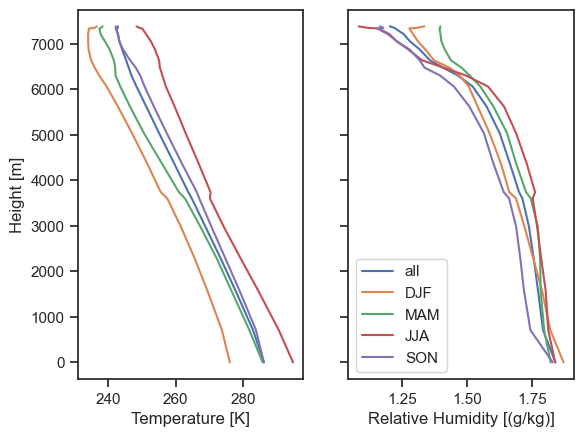

In [121]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
for season in ['all'] + seasons:
    t, q = supporting_routines.splitTQ(x_mean.sel(season=season).to_pandas())
    ax1.plot(t, t.index, label=season)
    ax2.plot(q, q.index, label=season)

ax2.legend()
ax1.set_xlabel('Temperature [K]')
ax2.set_xlabel('Relative Humidity [(g/kg)]')
ax1.set_ylabel('Height [m]')

Text(0.5, 1.0, '$\\mathbb{S}_{a}$ Humidity')

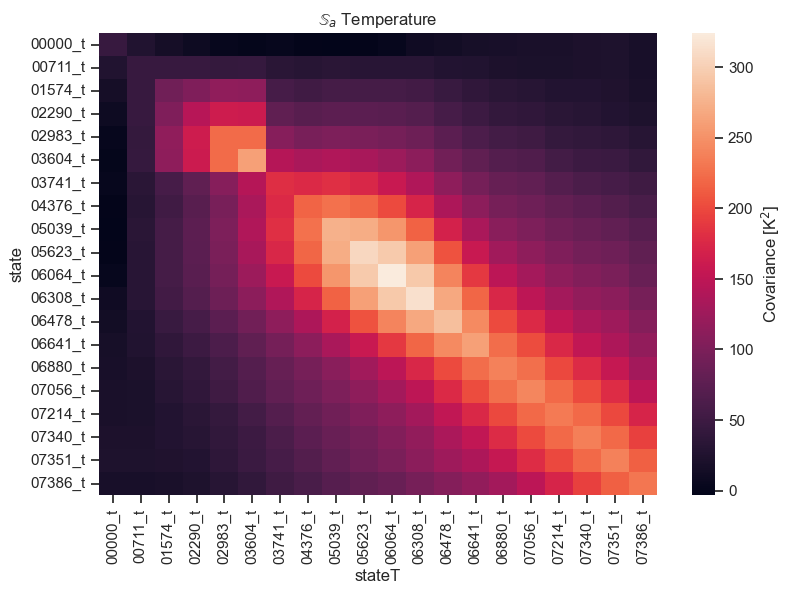

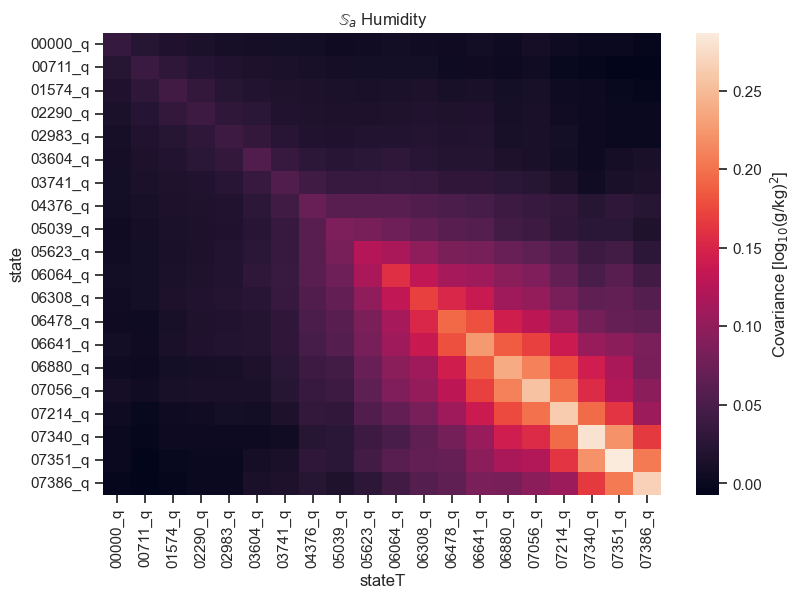

In [122]:
S_a = x_cov.sel(season='MAM').to_pandas()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(S_a.iloc[1::2, 1::2], ax=ax, cbar_kws={'label':'Covariance [K$^2$]'})
ax.set_title('$\mathbb{S}_{a}$ Temperature')
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(S_a.iloc[::2, ::2], ax=ax, cbar_kws={'label':'Covariance [log$_{10}$(g/kg)$^2$]'})
ax.set_title('$\mathbb{S}_{a}$ Humidity')

In [123]:
height = priors['all'].height

pressure = []
for k in ['all'] + seasons:
    pressure.append(priors[k].bar_pres.mean('time'))
pressure = xr.concat(pressure, dim='season')
pressure['season'] = ['all'] + seasons
pressure = pressure.to_pandas()
pressure

height,0.000000,711.930417,1574.701018,2290.137934,2983.033038,3604.694119,3741.872890,4376.620855,5039.967918,5623.658705,6064.097439,6308.468335,6478.091032,6641.685947,6880.900244,7056.691882,7214.525235,7340.003362,7351.176067,7386.125244
season,,,,,,,,,,,,,,,,,,,,
all,83938.839995,77285.363539,70041.805226,64524.620170,59647.202330,55338.355149,53647.334059,49549.895790,45617.910448,42365.764828,39996.942043,38629.858336,37685.780298,36784.033002,35589.075399,34764.256133,34062.911153,33539.701222,33537.923251,33429.079498
DJF,84371.865285,78179.067358,71069.262721,65686.551544,60893.055556,56211.323851,53614.183552,49504.334365,45453.610224,41843.047239,39007.072136,37052.830189,35784.383562,34662.203024,33784.476067,33435.587762,33069.215292,33239.370079,34139.361702,34393.273543
MAM,83953.725079,76870.304302,69814.120735,64684.163136,59721.531869,55101.522567,52873.079214,48436.601705,44243.017456,40925.986842,38731.155779,37506.384743,37052.894212,36444.510035,35354.595336,34486.421725,33662.570888,33347.113164,33722.686567,34084.848485
JJA,83372.312287,76211.902730,68458.906450,62276.814083,57048.066058,52939.226033,52246.989141,48573.763118,44951.300357,42039.701969,39860.287356,38822.616700,38040.467219,37516.753472,36347.733848,35390.702703,34232.888350,33260.027855,32679.571664,31988.304094
SON,84144.895602,77988.360729,71002.846975,65740.878530,61243.201455,57329.717200,55776.688674,51537.957710,47596.745407,44331.123288,41998.528546,40665.494360,39365.295438,37961.538462,36300.639269,35198.138573,34774.339623,34128.508124,34066.240876,34237.788018


In [124]:
import numpy as np
import pandas as pd

#Assuming profiles is an xarray Dataset or DataArray
profiles_t = profiles['temp'].to_pandas()
profiles_t
# # Proceed with the rest of the code as before
profiles_t.columns = ['%05i_t' % (i) for i in profiles_t.columns]
profiles_q = profiles['q'].to_pandas()
profiles_q.columns = ['%05i_q' % (i) for i in profiles_q.columns]
x_truths = pd.concat((profiles_t, profiles_q), axis=1)
x_truths = x_truths.reindex(sorted(x_truths.index), axis=0)
x_truths.columns.name = 'state'
x_truths.index.name = 'time'

# assert np.all(np.isfinite(x_truths))
x_truths



# import numpy as np
# import pandas as pd

# profiles_t = profiles['temp'].to_pandas()
# profiles_t.columns = ['%05i_t' % (i) for i in profiles_t.columns]
# profiles_q = profiles['q'].to_pandas()
# profiles_q.columns = ['%05i_q' % (i) for i in profiles_q.columns]

# x_truths = pd.concat((profiles_t, profiles_q), axis=1)
# x_truths = x_truths.reindex(sorted(x_truths.index), axis=0)
# # x_truths = np.nan_to_num(x_truths) 
# x_truths
# x_truths.columns.name = 'state'
# x_truths.index.name = 'time'

# # Replace missing values with mean
# x_truths_filled = x_truths.fillna(x_truths.mean())

# # Check for infinite values
# infinite_values = not np.all(np.isfinite(x_truths_filled.values))
# print("Infinite Values Present after filling missing values:", infinite_values)

# # Ensure all values are finite
# assert np.all(np.isfinite(x_truths_filled)), "Not all values are finite after filling missing values"

# # Now x_truths_filled can be used without any infinite or missing values

# # assert np.all(np.isfinite(x_truths))
# x_truths

state,00000_t,00711_t,01574_t,02290_t,02983_t,03604_t,03741_t,04376_t,05039_t,05623_t,...,06064_q,06308_q,06478_q,06641_q,06880_q,07056_q,07214_q,07340_q,07351_q,07386_q
time,,,,,,,,,,,,,,,,,,,,,
2009-04-10 00:00:00,277.35,275.95,276.95,275.15,273.55,273.15,272.05,270.85,269.45,268.65,...,1.476682,1.352219,1.528785,1.515180,1.467850,1.463978,1.605959,1.672893,1.492115,1.531375
2011-07-22 00:00:00,293.75,293.75,294.75,291.75,291.15,287.35,283.55,273.15,272.45,270.45,...,1.977390,1.937906,1.897140,1.979197,1.979125,1.982183,0.972358,0.610473,0.773608,0.923608
2018-11-24 12:00:00,285.15,283.15,282.75,281.55,279.95,278.95,279.35,280.15,275.95,268.05,...,1.749522,1.784752,1.512564,1.736748,1.774168,0.915017,1.059896,1.597105,1.509124,1.870217
2023-09-27 00:00:00,285.15,286.15,286.55,287.35,287.15,286.55,287.35,282.55,281.75,278.35,...,1.778582,1.843024,1.883080,1.934281,1.835605,1.693693,1.546576,1.273596,1.174539,1.204382


In [125]:
# x_truths_filled = x_truths.interpolate(method='linear', axis=1, limit_direction='both')  # Interpolate NaN values along columns using linear interpolation
# # print(x_truths_filled)
# x_truths=x_truths_filled
# x_truths

assert np.all(np.isfinite(x_truths))
x_truths

state,00000_t,00711_t,01574_t,02290_t,02983_t,03604_t,03741_t,04376_t,05039_t,05623_t,...,06064_q,06308_q,06478_q,06641_q,06880_q,07056_q,07214_q,07340_q,07351_q,07386_q
time,,,,,,,,,,,,,,,,,,,,,
2009-04-10 00:00:00,277.35,275.95,276.95,275.15,273.55,273.15,272.05,270.85,269.45,268.65,...,1.476682,1.352219,1.528785,1.515180,1.467850,1.463978,1.605959,1.672893,1.492115,1.531375
2011-07-22 00:00:00,293.75,293.75,294.75,291.75,291.15,287.35,283.55,273.15,272.45,270.45,...,1.977390,1.937906,1.897140,1.979197,1.979125,1.982183,0.972358,0.610473,0.773608,0.923608
2018-11-24 12:00:00,285.15,283.15,282.75,281.55,279.95,278.95,279.35,280.15,275.95,268.05,...,1.749522,1.784752,1.512564,1.736748,1.774168,0.915017,1.059896,1.597105,1.509124,1.870217
2023-09-27 00:00:00,285.15,286.15,286.55,287.35,287.15,286.55,287.35,282.55,281.75,278.35,...,1.778582,1.843024,1.883080,1.934281,1.835605,1.693693,1.546576,1.273596,1.174539,1.204382


In [126]:
# def forwardRT(X, pressure=None, zenithAngle=0, frequencies=[]):
#     # Convert X to a pandas DataFrame or Series object if it's a numpy array
#     if isinstance(X, np.ndarray):
#         X = pd.Series(X, index=[f'{i}_t' for i in pd.date_range(start='2015-09-21T12:00:00.000000000', periods=len(X), freq='D')])

#     # X contains T and Q, lets split the vector
#     t_index, q_index = supporting_routines.splitTQ(X)
#     # humidity is in log10 scale, convert to linear in kg/kg
#     temperature, humidity = supporting_routines.splitTQ(X)
#     humidity = (10**humidity) / 1000.  # Assign humidity before using it
#     # Height in meters comes from index of the temperature (or humidity) vector
#     heights = temperature.index
#     assert np.all(np.diff(heights) > 0)

#     # get absolute humidity from specific humidity
#     abs_humidity = supporting_routines.q2a(humidity, pressure, temperature)
    
#     # run the forward operator
#     TB, tau, tau_wv, tau_o2 = nonScatMWRadTran.STP_IM10(
#         heights,  # [m]  
#         temperature,  # [K]
#         pressure,  # [Pa]
#         abs_humidity,  # [kgm^-3]
#         zenithAngle,  # zenith angle of observation in deg.
#         frequencies,  # frequency vector in GHz
#     )
#     return TB


In [127]:
def forwardRT(X, pressure=None, zenithAngle=0, frequencies=[]):

    # X contains T and Q, lets split the vector
    temperature, humidity = supporting_routines.splitTQ(X)
    # humdity is in log10 scale, convert to linear in kg/kg
#     humidity = (10**humidity) / 1000.
    # Height in meters comes from index of the temperature (or humidty) vector
    heights = temperature.index
    assert np.all(np.diff(heights) > 0)

    # get absolute humidty from specific humdity
    abs_humidity = supporting_routines.q2a(humidity, pressure, temperature)
    
    # run the forward operator
    TB, tau, tau_wv, tau_o2 = nonScatMWRadTran.STP_IM10(
        heights,  # [m]  
        temperature,  # [K]
        pressure,  # [Pa]
        abs_humidity,  # [kgm^-3]
        zenithAngle,  # zenith angle of observation in deg.
        frequencies,  # frequency vector in GHz
    )
    return TB

In [128]:
frequencies = [ 
   22.24, 23.04, 23.84, 25.44, 26.24, 27.84, 31.4, 51.26, 52.28, 53.86, 54.94,
    56.66, 57.3, 58.
]

# 22.23 
# 23.03 
# 23.83
# 26.23
# 30. 
# 51.25 
# 52.280
# 53.85
# 54.94 
# 56.66 
# 57.29
# 58.8
# 59.4 
# 60. 



In [129]:
y_vars = np.array(frequencies)
x_vars = x_mean.state.values
print('y_vars:\n', y_vars)
print('x_vars:\n', x_vars)

y_vars:
 [22.24 23.04 23.84 25.44 26.24 27.84 31.4  51.26 52.28 53.86 54.94 56.66
 57.3  58.  ]
x_vars:
 ['00000_q' '00000_t' '00711_q' '00711_t' '01574_q' '01574_t' '02290_q'
 '02290_t' '02983_q' '02983_t' '03604_q' '03604_t' '03741_q' '03741_t'
 '04376_q' '04376_t' '05039_q' '05039_t' '05623_q' '05623_t' '06064_q'
 '06064_t' '06308_q' '06308_t' '06478_q' '06478_t' '06641_q' '06641_t'
 '06880_q' '06880_t' '07056_q' '07056_t' '07214_q' '07214_t' '07340_q'
 '07340_t' '07351_q' '07351_t' '07386_q' '07386_t']


In [130]:
season = 'MAM'  #summer june july august
profile = np.datetime64('2009-04-10T00:00:00.000000000')
x_truth = x_truths.loc[profile]
x_truth

state
00000_t    277.350000
00711_t    275.950000
01574_t    276.950000
02290_t    275.150000
02983_t    273.550000
03604_t    273.150000
03741_t    272.050000
04376_t    270.850000
05039_t    269.450000
05623_t    268.650000
06064_t    268.650000
06308_t    266.650000
06478_t    263.250000
06641_t    260.050000
06880_t    258.450000
07056_t    257.650000
07214_t    252.450000
07340_t    247.450000
07351_t    245.850000
07386_t    244.650000
00000_q      1.972510
00711_q      1.953545
01574_q      1.960098
02290_q      1.959508
02983_q      1.955798
03604_q      1.871914
03741_q      1.961672
04376_q      1.980692
05039_q      1.996751
05623_q      1.996729
06064_q      1.476682
06308_q      1.352219
06478_q      1.528785
06641_q      1.515180
06880_q      1.467850
07056_q      1.463978
07214_q      1.605959
07340_q      1.672893
07351_q      1.492115
07386_q      1.531375
Name: 2009-04-10 00:00:00, dtype: float64

In [131]:
y_noise = pd.Series(
    [
        0.12026637, 0.10864162, 0.10412012, 0.0918477, 0.10174478, 0.10085633,
        0.10500476, 0.42303663, 0.45658514, 0.26291823, 0.25538793, 0.1773584,
        0.17556195, 0.59489495
    ],
    index=y_vars
)

S_y = pd.DataFrame(
    np.diag(y_noise.values**2),
    index=y_vars,
    columns=y_vars,
)


Text(0.5, 1.0, 'Measurement uncertainty $\\mathbf{S}_{y}$')

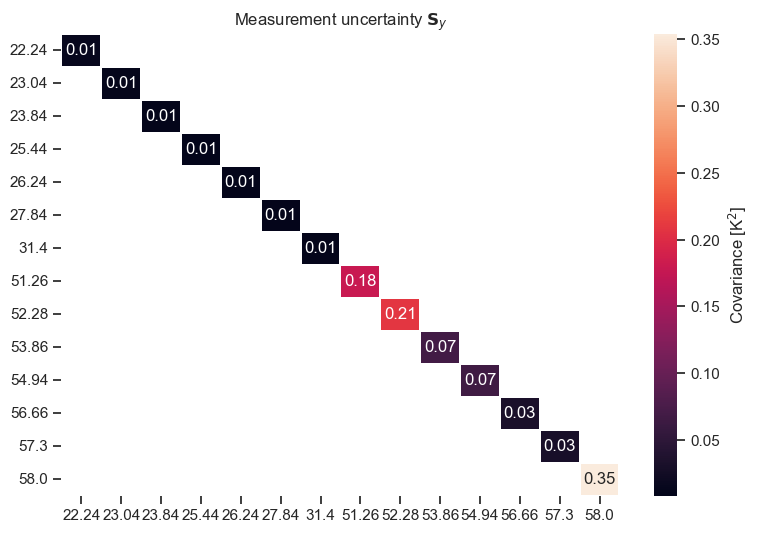

In [132]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(
    S_y.where(S_y > 0), 
    annot=True, 
    fmt='.2f', 
    ax=ax, 
    linewidths=.05, 
    cbar_kws={'label':'Covariance [K$^2$]'}
)
ax.set_title(r'Measurement uncertainty $\mathbf{S}_{y}$')

In [133]:
x_a = x_mean.sel(season='JJA').to_pandas()[x_vars]
S_a = x_cov.sel(season='JJA').to_pandas().loc[x_vars, x_vars]

In [134]:
singularMatrix = np.array([[1,0,0], [1,0,1e-50], [1,1e-50,0]])
np.linalg.inv(singularMatrix)

array([[ 1.e+00,  0.e+00,  0.e+00],
       [-1.e+50,  0.e+00,  1.e+50],
       [-1.e+50,  1.e+50,  0.e+00]])

In [135]:
x_truth

state
00000_t    277.350000
00711_t    275.950000
01574_t    276.950000
02290_t    275.150000
02983_t    273.550000
03604_t    273.150000
03741_t    272.050000
04376_t    270.850000
05039_t    269.450000
05623_t    268.650000
06064_t    268.650000
06308_t    266.650000
06478_t    263.250000
06641_t    260.050000
06880_t    258.450000
07056_t    257.650000
07214_t    252.450000
07340_t    247.450000
07351_t    245.850000
07386_t    244.650000
00000_q      1.972510
00711_q      1.953545
01574_q      1.960098
02290_q      1.959508
02983_q      1.955798
03604_q      1.871914
03741_q      1.961672
04376_q      1.980692
05039_q      1.996751
05623_q      1.996729
06064_q      1.476682
06308_q      1.352219
06478_q      1.528785
06641_q      1.515180
06880_q      1.467850
07056_q      1.463978
07214_q      1.605959
07340_q      1.672893
07351_q      1.492115
07386_q      1.531375
Name: 2009-04-10 00:00:00, dtype: float64

In [136]:
import pandas as pd

# Assuming 'series' is your pandas Series
has_nan = x_truth.isna().any()

# Print whether there are NaN values
print("Are there any NaN values in the series?", has_nan)


Are there any NaN values in the series? False


In [137]:
try:
    pyOE.invertMatrix(singularMatrix)
except Exception as err:
    traceback.print_tb(err.__traceback__)

  File "C:\Users\angsh\AppData\Local\Temp\ipykernel_8908\384370707.py", line 2, in <module>
    pyOE.invertMatrix(singularMatrix)
  File "C:\Users\angsh\anaconda3\envs\pyvenv\lib\site-packages\pyOptimalEstimation\pyOEcore.py", line 1485, in invertMatrix
    raise ValueError("Found singular matrix", UserWarning)


In [138]:
forwardKwArgs = dict(
    pressure=pressure.loc['JJA'].values,
    zenithAngle=0,
    frequencies=frequencies
)

In [139]:
x_truth

state
00000_t    277.350000
00711_t    275.950000
01574_t    276.950000
02290_t    275.150000
02983_t    273.550000
03604_t    273.150000
03741_t    272.050000
04376_t    270.850000
05039_t    269.450000
05623_t    268.650000
06064_t    268.650000
06308_t    266.650000
06478_t    263.250000
06641_t    260.050000
06880_t    258.450000
07056_t    257.650000
07214_t    252.450000
07340_t    247.450000
07351_t    245.850000
07386_t    244.650000
00000_q      1.972510
00711_q      1.953545
01574_q      1.960098
02290_q      1.959508
02983_q      1.955798
03604_q      1.871914
03741_q      1.961672
04376_q      1.980692
05039_q      1.996751
05623_q      1.996729
06064_q      1.476682
06308_q      1.352219
06478_q      1.528785
06641_q      1.515180
06880_q      1.467850
07056_q      1.463978
07214_q      1.605959
07340_q      1.672893
07351_q      1.492115
07386_q      1.531375
Name: 2009-04-10 00:00:00, dtype: float64

In [140]:
# forwardKwArgs = dict(
#     pressure=pressure.loc['SON'].values,
#     zenithAngle=0,
#     frequencies=frequencies
# )

y_obs = forwardRT(x_truth, **forwardKwArgs)
y_obs = pd.Series(y_obs, index=y_vars)
assert np.all(np.isfinite(y_obs))

In [141]:
oe_ref = pyOE.optimalEstimation(
    x_vars,       # state variable names
    x_a,          # a priori
    S_a,          # a priori uncertainty
    y_vars,       # measurement variable names
    y_obs,        # observations
    S_y,      # observation uncertainty
    forwardRT,    # forward Operator
    forwardKwArgs=forwardKwArgs,  # additional function arguments
    x_truth=x_truth,              # true profile
)


In [142]:
oe_ref.doRetrieval()

0.19 s, iteration 1, degrees of freedom: 1.83 of 40, not converged (x-space):  9.374
0.28 s, iteration 2, degrees of freedom: 1.84 of 40, converged (x-space):  0.007
0.38 s, iteration 3, degrees of freedom: 1.84 of 40, done.  0.000


True

In [143]:
print(oe_ref.x_op[:10])
print(oe_ref.S_op[:10])

00000_q      2.194379
00000_t    277.302705
00711_q      2.113227
00711_t    276.774171
01574_q      2.031863
01574_t    271.589821
02290_q      1.918650
02290_t    267.625922
02983_q      1.846685
02983_t    263.473335
dtype: float64
          00000_q   00000_t   00711_q   00711_t   01574_q    01574_t  \
00000_q  0.011156 -0.000427  0.007241  0.005763  0.007270   0.016285   
00000_t -0.000427  0.009503  0.000150 -0.154749 -0.000075  -0.219711   
00711_q  0.007241  0.000150  0.020084 -0.006050  0.015852   0.105954   
00711_t  0.005763 -0.154749 -0.006050  2.979184 -0.001220   4.207498   
01574_q  0.007270 -0.000075  0.015852 -0.001220  0.028770   0.168141   
01574_t  0.016285 -0.219711  0.105954  4.207498  0.168141  39.759327   
02290_q  0.007109 -0.000930  0.013202  0.015545  0.024564   0.358865   
02290_t -0.005677 -0.241986  0.144485  4.629783  0.187732  45.431199   
02983_q  0.006357 -0.001383  0.013085  0.024377  0.021310   0.512788   
02983_t  0.025649 -0.270561  0.181529  5.1678

In [144]:
print(oe_ref.x_op_err[:10])

00000_q     0.105621
00000_t     0.097486
00711_q     0.141718
00711_t     1.726031
01574_q     0.169616
01574_t     6.305500
02290_q     0.234095
02290_t     8.266436
02983_q     0.280322
02983_t    10.469472
dtype: float64


In [145]:
print('total', oe_ref.dgf)
print(oe_ref.dgf_x[:10])

total 1.8429150366021838
00000_q    1.033390e-04
00000_t    9.960193e-01
00711_q   -1.731566e-04
00711_t    8.469648e-01
01574_q    4.852962e-11
01574_t    7.648202e-07
02290_q    0.000000e+00
02290_t    0.000000e+00
02983_q    0.000000e+00
02983_t    0.000000e+00
dtype: float64


In [146]:
help(oe_ref)

Help on optimalEstimation in module pyOptimalEstimation.pyOEcore object:

class optimalEstimation(builtins.object)
 |  optimalEstimation(x_vars, x_a, S_a, y_vars, y_obs, S_y, forward, userJacobian=None, x_truth=None, b_vars=[], b_p=[], S_b=[[]], x_lowerLimit={}, x_upperLimit={}, useFactorInJac=False, gammaFactor=None, perturbation=0.1, disturbance=None, convergenceFactor=10, convergenceTest='x', forwardKwArgs={}, multipleForwardKwArgs=None, verbose=None)
 |  
 |  The core optimalEstimation class, which contains all required parameters.
 |  See [1]_ for an extensive introduction into Optimal Estimation theory, 
 |  [2]_ discusses this library
 |  
 |  Parameters
 |  ----------
 |  x_vars : list of str
 |      names of the elements of state vector x.
 |  x_a : pd.Series or list or np.ndarray
 |      prior information of state x.
 |  S_a : pd.DataFrame or list or np.ndarray
 |      covariance matrix of state x.
 |  y_vars : list of str
 |      names of the elements of state vector x
 |  y

C:\Users\angsh\anaconda3\envs\pyvenv\lib\site-packages\pyOptimalEstimation\pyOEcore.py:1339: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sp4.set_xticklabels(xlabels)


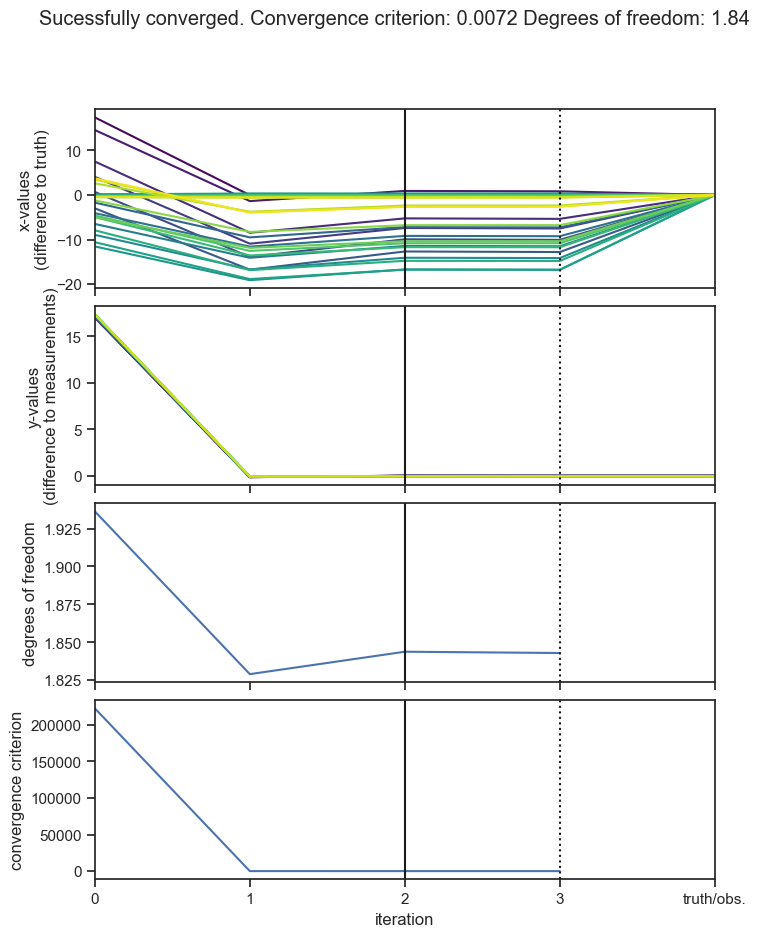

In [147]:
fig = oe_ref.plotIterations(legend=False, mode='difference')

In [148]:
oe_ref.x_op

00000_q      2.194379
00000_t    277.302705
00711_q      2.113227
00711_t    276.774171
01574_q      2.031863
01574_t    271.589821
02290_q      1.918650
02290_t    267.625922
02983_q      1.846685
02983_t    263.473335
03604_q      1.831475
03604_t    260.338269
03741_q      1.931418
03741_t    264.775662
04376_q      1.884213
04376_t    261.595832
05039_q      1.830456
05039_t    257.938321
05623_q      1.795108
05623_t    254.485388
06064_q      1.717471
06064_t    251.864451
06308_q      1.675012
06308_t    249.847566
06478_q      1.539172
06478_t    248.438454
06641_q      1.458206
06641_t    248.311713
06880_q      1.337593
06880_t    247.614081
07056_q      1.300781
07056_t    247.281677
07214_q      1.217250
07214_t    245.679020
07340_q      1.121156
07340_t    245.091558
07351_q      1.006065
07351_t    243.290951
07386_q      0.956043
07386_t    242.007686
dtype: float64

Text(0.5, 1.0, '$\\mathbf{S}_{op}$ Humidity')

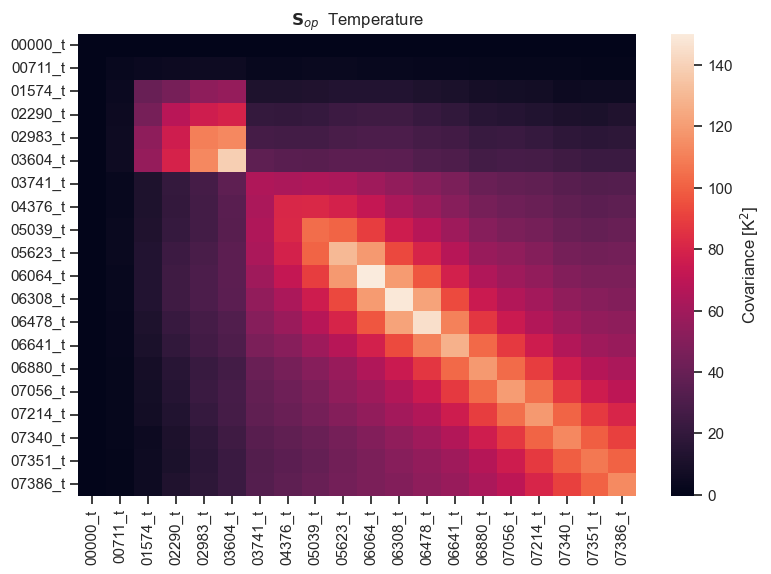

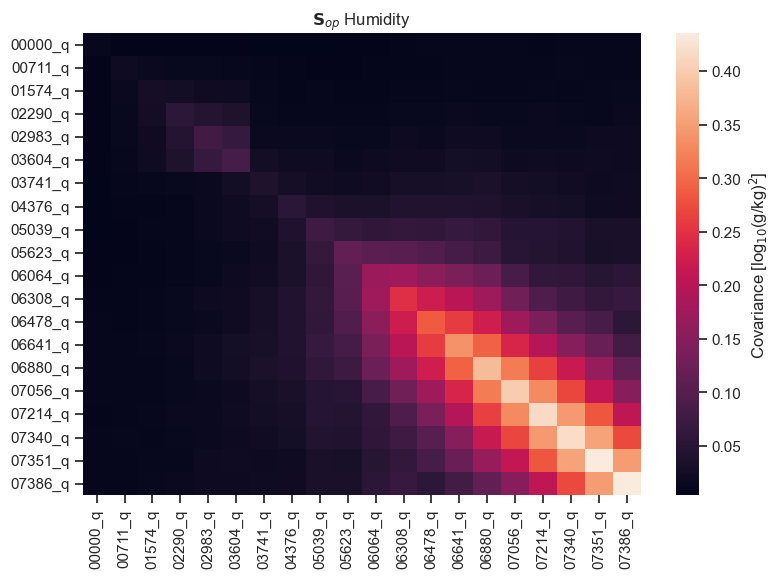

In [149]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(oe_ref.S_op .iloc[1::2, 1::2], ax=ax, cbar_kws={'label':'Covariance [K$^2$]'})
ax.set_title('$\mathbf{S}_{op}$  Temperature')

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(oe_ref.S_op .iloc[::2, ::2], ax=ax, cbar_kws={'label':'Covariance [log$_{10}$(g/kg)$^2$]'})
ax.set_title('$\mathbf{S}_{op}$ Humidity')

In [150]:
oe_ref.x_op_err

00000_q     0.105621
00000_t     0.097486
00711_q     0.141718
00711_t     1.726031
01574_q     0.169616
01574_t     6.305500
02290_q     0.234095
02290_t     8.266436
02983_q     0.280322
02983_t    10.469472
03604_q     0.290413
03604_t    11.784999
03741_q     0.198327
03741_t     8.057108
04376_q     0.227629
04376_t     8.992177
05039_q     0.274826
05039_t    10.188514
05623_q     0.334635
05623_t    11.414629
06064_q     0.412682
06064_t    12.252267
06308_q     0.496986
06308_t    12.190016
06478_q     0.534900
06478_t    12.044833
06641_q     0.581613
06641_t    11.290588
06880_q     0.616974
06880_t    10.891052
07056_q     0.631594
07056_t    10.953702
07214_q     0.645167
07214_t    10.896001
07340_q     0.646831
07340_t    10.617323
07351_q     0.658818
07351_t    10.379008
07386_q     0.659704
07386_t    10.635381
dtype: float64

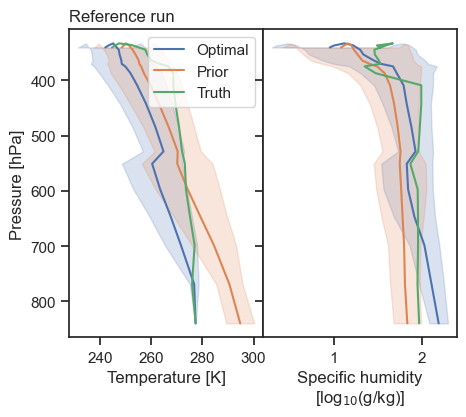

In [151]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='Reference run')

In [152]:
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_ref.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_ref.x_truth)

print('RMS X Temperature: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('RMS X Humidity: %g [log$_{10}$(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))
print('RMS Y %g [K]'% np.sqrt(np.mean((oe_ref.y_obs - oe_ref.y_op)**2)))

RMS X Temperature: 10.0859 [K]
RMS X Humidity: 25.5869 [log$_{10}$(g/kg)]
RMS Y 0.0265807 [K]


In [153]:
chiSquareTest = oe_ref.chiSquareTest(significance=0.05)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 40. (This is typically safe to ignore)       


In [154]:
print('\nTests passed:\n' ,chiSquareTest[0])


Tests passed:
 chi2test
Y_Optimal_vs_Observation     True
Y_Observation_vs_Prior       True
Y_Optimal_vs_Prior          False
X_Optimal_vs_Prior          False
dtype: bool


In [155]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_ref.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Linearity test passed:  True


In [156]:
x_a = x_mean.sel(season='MAM').to_pandas()  # as before
S_a = x_cov.sel(season='MAM')  # as before
S_a_diag = np.diag(np.diag(S_a))

In [157]:
oe_diag = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a_diag,
    y_vars,
    y_obs,
    S_y,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_diag.doRetrieval()

0.20 s, iteration 1, degrees of freedom: 1.94 of 40, converged (x-space):  0.908
0.30 s, iteration 2, degrees of freedom: 1.94 of 40, done.  0.000


True

In [158]:
oe_diag.dgf, oe_ref.dgf

(1.9438576017663958, 1.8429150366021838)

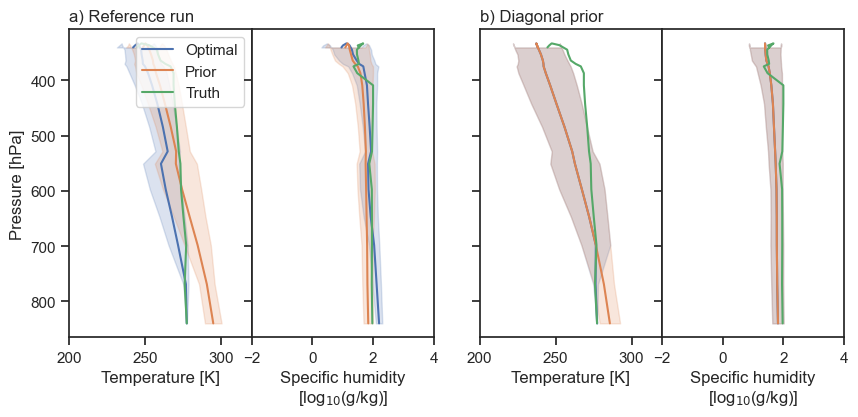

In [159]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_diag,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Diagonal prior',
    xlimT = (200, 320),
    xlimH = (-2,4),
)


In [160]:
print('Reference run:')
supporting_routines.print_mwr_rms(oe_ref)
print('Diagonal prior:')
supporting_routines.print_mwr_rms(oe_diag)


Reference run:
RMS X Temperature: 10.0859 [K]
RMS X Humidity: 25.5869 [log$_{10}$(g/kg)]
RMS Y 0.0265807 [K]
Diagonal prior:
RMS X Temperature: 14.9296 [K]
RMS X Humidity: 28.2818 [log$_{10}$(g/kg)]
RMS Y 0.00998636 [K]


In [161]:
print(oe_diag.chiSquareTest()[0])

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [162]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_diag.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Linearity test passed:  True


In [163]:
x_a = x_mean.sel(season='JJA').to_pandas()
S_a = x_cov.sel(season='JJA').to_pandas()
forwardKwArgs = dict(
    pressure=pressure.loc['JJA'].values,
    zenithAngle=0,
    frequencies=frequencies
)

In [164]:
oe_sum = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_y,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_sum.doRetrieval()

0.20 s, iteration 1, degrees of freedom: 1.83 of 40, not converged (x-space):  9.374
0.29 s, iteration 2, degrees of freedom: 1.84 of 40, converged (x-space):  0.007
0.38 s, iteration 3, degrees of freedom: 1.84 of 40, done.  0.000


True

In [165]:
oe_ref.dgf, oe_sum.dgf

(1.8429150366021838, 1.8429150366021838)

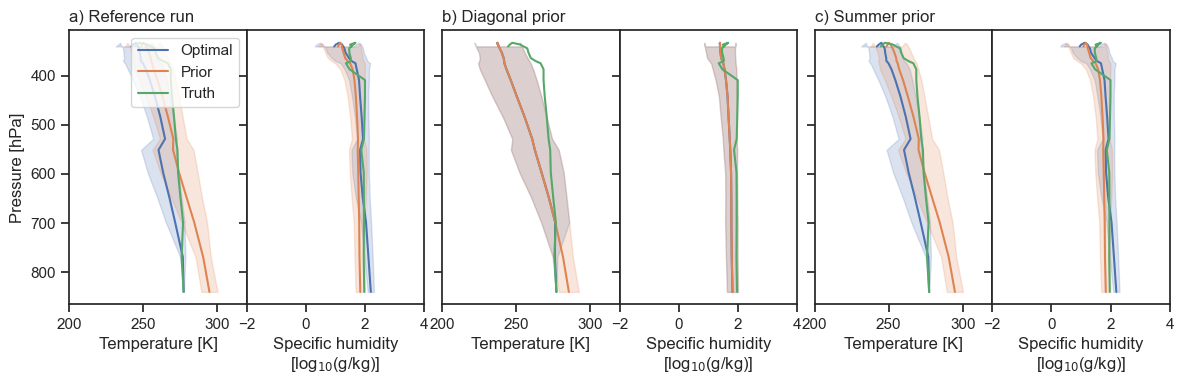

In [166]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_diag,
    oe3 = oe_sum,
    h=pressure.loc['MAM'] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Diagonal prior',
    title3='c) Summer prior',
    xlimT = (200, 320),
    xlimH = (-2,4),
)
fig.tight_layout()
fig.savefig('Figure2.png', dpi=200)
fig.savefig('Figure2.pdf')

In [167]:
print('Reference run:')
supporting_routines.print_mwr_rms(oe_ref)
print('Summer prior:')
supporting_routines.print_mwr_rms(oe_sum)

Reference run:
RMS X Temperature: 10.0859 [K]
RMS X Humidity: 25.5869 [log$_{10}$(g/kg)]
RMS Y 0.0265807 [K]
Summer prior:
RMS X Temperature: 10.0859 [K]
RMS X Humidity: 25.5869 [log$_{10}$(g/kg)]
RMS Y 0.0265807 [K]


In [168]:
print(oe_sum.chiSquareTest()[0])

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation     True
Y_Observation_vs_Prior       True
Y_Optimal_vs_Prior          False
X_Optimal_vs_Prior          False
dtype: bool


In [169]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_sum.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Linearity test passed:  True


In [170]:
S_b = pd.DataFrame(
    np.array([
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 3.0, 3.3, 1.2, 0.1, 0.0, 0.0, 0.0],
        [0.3, 0.3, 0.4, 0.4, 0.4, 0.5, 0.7, 8.7, 9.2, 3.3, 0.3, 0.0, 0.0, 0.0],
        [0.3, 0.4, 0.4, 0.4, 0.5, 0.5, 0.7, 8.2, 8.7, 3.0, 0.3, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.7, 0.7, 0.2, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.5, 0.5, 0.2, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
    ]),
    index=frequencies[::-1],
    columns=frequencies)

Text(0.5, 1.0, "Model uncertainty $\\mathbf{S}_{b}$' (Cimini et al. 2018)")

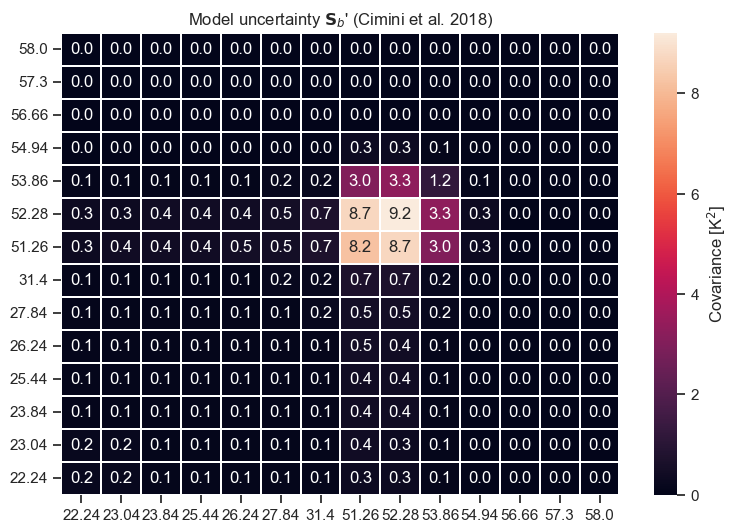

In [171]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(
    S_b, 
    annot=True, 
    linewidths=.05, 
    ax=ax, 
    fmt='.1f', 
    cbar_kws={'label':'Covariance [K$^2$]'}
)
ax.set_title(r"Model uncertainty $\mathbf{S}_{b}$' (Cimini et al. 2018)")

In [172]:
x_a = x_mean.sel(season='MAM').to_pandas() # as for the reference run
S_a = x_cov.sel(season='MAM').to_pandas() # as for the reference run
S_e = S_y + S_b

assert (S_e.values == S_e.values.T).all()

forwardKwArgs = dict(
    pressure=pressure.loc['MAM'].values,
    zenithAngle=0,
    frequencies=frequencies
)

oe_b = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_b.doRetrieval()

0.20 s, iteration 1, degrees of freedom: 1.50 of 40, converged (x-space):  0.060


0.30 s, iteration 2, degrees of freedom: 1.51 of 40, done.  0.000


True

In [173]:
oe_ref.dgf, oe_b.dgf

(1.8429150366021838, 1.5111200177324118)

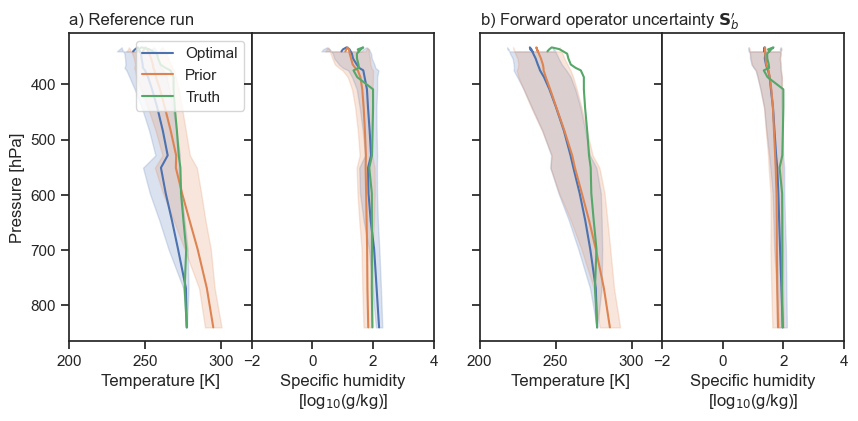

In [174]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_b,
    h=pressure.loc['MAM'] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2="b) Forward operator uncertainty $\mathbf{S}_b'$",
    xlimT = (200, 320),
    xlimH = (-2,4),
)

In [175]:
print('Reference run:')
supporting_routines.print_mwr_rms(oe_ref)
print('Concidering forward model error:')
supporting_routines.print_mwr_rms(oe_b)


Reference run:
RMS X Temperature: 10.0859 [K]
RMS X Humidity: 25.5869 [log$_{10}$(g/kg)]
RMS Y 0.0265807 [K]
Concidering forward model error:
RMS X Temperature: 16.8972 [K]
RMS X Humidity: 24.6795 [log$_{10}$(g/kg)]
RMS Y 0.0175306 [K]


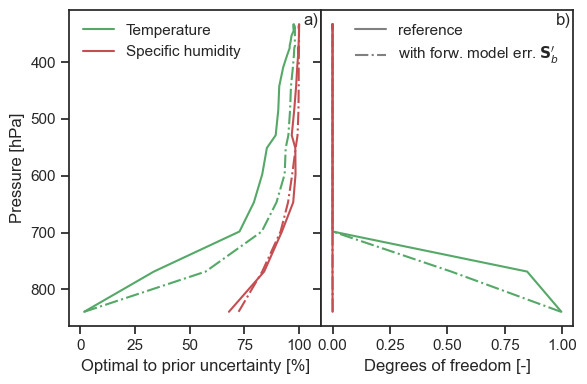

In [176]:
fig = supporting_routines.plot_uncertainty_dof(
    oe_ref, oe_b, 'with forw. model err. $\mathbf{S}_b\'$',
    pressure.loc['MAM'] / 100,
)
fig.tight_layout()
fig.subplots_adjust(wspace=0)
fig.savefig('Figure3.png', dpi=200)
fig.savefig('Figure3.pdf')

In [177]:
((oe_b.x_op_err/oe_b.x_a_err) - (oe_ref.x_op_err/oe_ref.x_a_err)).max() * 100

23.640963902072443

In [178]:
print('Change in degrees of freedom for temperature variables %g' %
      (supporting_routines.splitTQ(oe_ref.dgf_x)[0].sum() -
       supporting_routines.splitTQ(oe_b.dgf_x)[0].sum()))
print('Change in degrees of freedom for humidity variables %g' %
      (supporting_routines.splitTQ(oe_ref.dgf_x)[1].sum() -
       supporting_routines.splitTQ(oe_b.dgf_x)[1].sum()))

Change in degrees of freedom for temperature variables 0.332344
Change in degrees of freedom for humidity variables -0.000548969


In [179]:
print(oe_b.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_ref.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
Linearity test passed:  True


In [180]:
x_a = x_mean.sel(season='MAM').to_pandas() # as reference
S_a = x_cov.sel(season='MAM').to_pandas() # as reference
S_e = S_y * 4
forwardKwArgs = dict(
    pressure=pressure.loc['MAM'].values,
    zenithAngle=0,
    frequencies=frequencies
)

oe_double = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_double.doRetrieval()

0.21 s, iteration 1, degrees of freedom: 1.69 of 40, converged (x-space):  0.384
0.31 s, iteration 2, degrees of freedom: 1.69 of 40, done.  0.000


True

In [181]:
S_e = S_y / 4

oe_half = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_half.doRetrieval()

0.19 s, iteration 1, degrees of freedom: 1.97 of 40, not converged (x-space):  4.885
0.30 s, iteration 2, degrees of freedom: 1.97 of 40, converged (x-space):  0.000
0.39 s, iteration 3, degrees of freedom: 1.97 of 40, done.  0.000


True

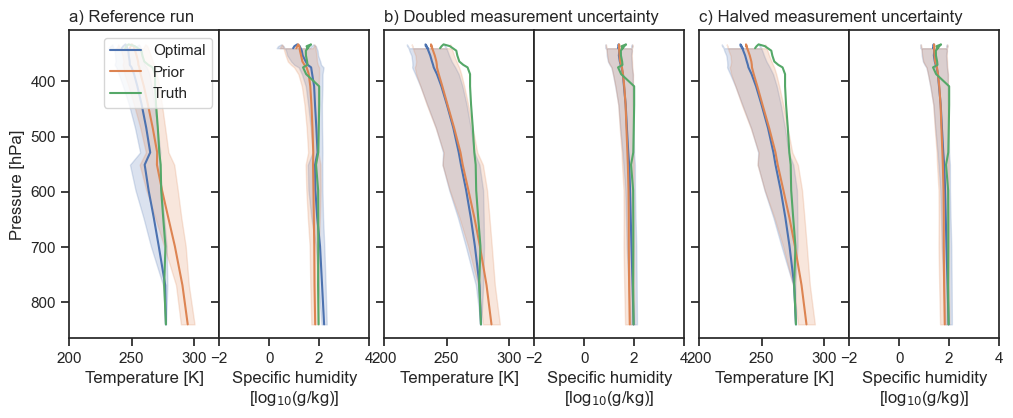

In [182]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_double,
    oe3 = oe_half,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Doubled measurement uncertainty',
    title3='c) Halved measurement uncertainty',
    xlimT = (200, 320),
    xlimH = (-2, 4),
)

In [183]:
print('### Reference run ###')
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_ref.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_ref.x_a)
print('Temperature RMS difference to x_a: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('Humidity RMS difference to x_a: %g [log10(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))

print('\n### Doubled measurement uncertainty ###')
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_double.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_double.x_a)
print('Temperature RMS difference to x_a: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('Humidity RMS difference to x_a: %g [log10(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))

print('\n### Halved measurement uncertainty ###')
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_half.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_half.x_a)
print('Temperature RMS difference to x_a: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('Humidity RMS difference to x_a: %g [log10(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))


### Reference run ###
Temperature RMS difference to x_a: 8.59362 [K]
Humidity RMS difference to x_a: 29.3972 [log10(g/kg)]

### Doubled measurement uncertainty ###
Temperature RMS difference to x_a: 3.60031 [K]
Humidity RMS difference to x_a: 9.84175 [log10(g/kg)]

### Halved measurement uncertainty ###
Temperature RMS difference to x_a: 3.73692 [K]
Humidity RMS difference to x_a: 9.81899 [log10(g/kg)]


Change in degrees of freedom for halved measurement uncertainties -0.130098
Change in degrees of freedom for doubled measurement uncertainties 0.148057


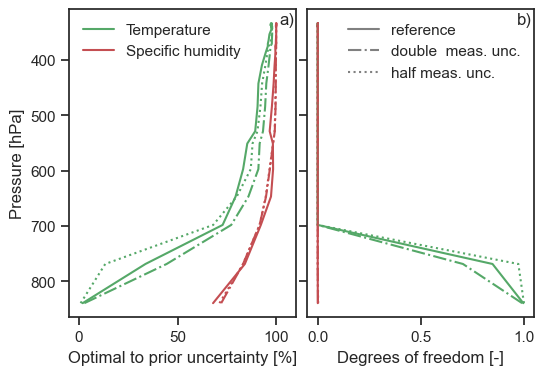

In [184]:
fig = supporting_routines.plot_uncertainty_dof(
    oe_ref, oe_double, 'double  meas. unc.',
    pressure.loc['MAM'] / 100,
    oe3=oe_half, label3 = 'half meas. unc.'
)

print('Change in degrees of freedom for halved measurement uncertainties %g' %
      (oe_ref.dgf - oe_half.dgf))
print('Change in degrees of freedom for doubled measurement uncertainties %g' %
      (oe_ref.dgf - oe_double.dgf))


In [185]:
print(oe_double.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_double.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
Linearity test passed:  True


In [186]:
print(oe_half.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_half.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
Linearity test passed:  True


Text(0.5, 1.0, 'Measurement uncertainty $\\mathbf{S}_{y}$ including non-diagonal elements.')

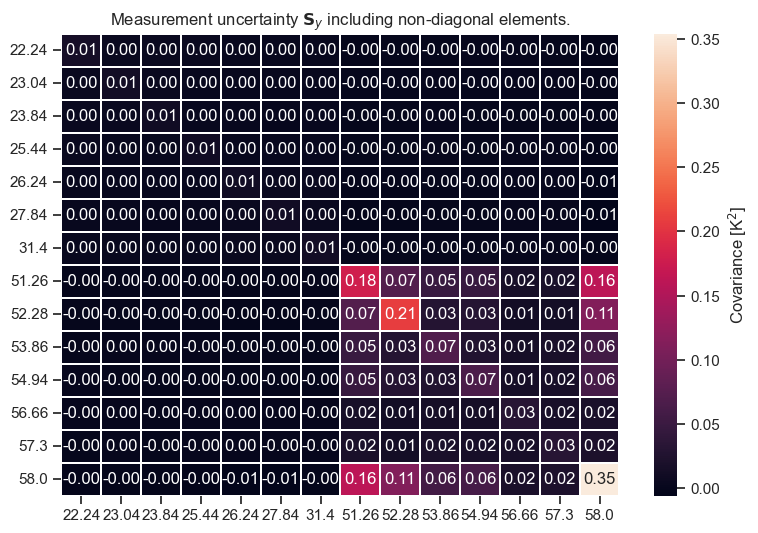

In [187]:
S_y_nondiag = np.array(
    [[
        1.4464e-02, 3.1175e-03, 3.2584e-03, 2.7590e-03, 2.1494e-03, 1.8121e-03,
        2.3444e-03, -2.8253e-03, -1.1941e-03, -7.1487e-04, -7.1019e-05,
        -1.3676e-04, -3.0526e-04, -3.8639e-03
    ],
     [
         3.1175e-03, 1.1803e-02, 2.5663e-03, 2.1457e-03, 1.5946e-03,
         1.6916e-03, 1.8975e-03, -7.3124e-04, -4.7555e-04, 1.8126e-04,
         -8.1855e-04, 4.6114e-04, 3.1963e-06, -2.5867e-03
     ],
     [
         3.2584e-03, 2.5663e-03, 1.0841e-02, 2.3239e-03, 1.1311e-03,
         1.1062e-03, 1.5767e-03, -6.4790e-04, -1.3201e-03, 1.7669e-04,
         -1.0165e-03, -4.5220e-04, -5.8443e-04, -1.9019e-03
     ],
     [
         2.7590e-03, 2.1457e-03, 2.3239e-03, 8.4360e-03, 1.3579e-03,
         1.5264e-03, 1.4780e-03, -8.7548e-04, -1.5626e-03, -1.7332e-04,
         -4.6437e-04, -1.8432e-04, -1.7265e-04, -3.8433e-03
     ],
     [
         2.1494e-03, 1.5946e-03, 1.1311e-03, 1.3579e-03, 1.0352e-02,
         3.3218e-03, 3.1755e-03, -2.2734e-03, -2.3389e-03, -1.2198e-03,
         -7.2950e-04, 2.0710e-04, 2.5822e-04, -5.9091e-03
     ],
     [
         1.8121e-03, 1.6916e-03, 1.1062e-03, 1.5264e-03, 3.3218e-03,
         1.0172e-02, 3.2801e-03, -2.0768e-03, -2.1563e-03, -4.6483e-04,
         -1.6465e-03, 9.4358e-05, -2.8649e-04, -5.4612e-03
     ],
     [
         2.3444e-03, 1.8975e-03, 1.5767e-03, 1.4780e-03, 3.1755e-03,
         3.2801e-03, 1.1026e-02, -3.1658e-04, -1.1692e-03, -7.5206e-04,
         -1.0920e-03, -3.7627e-05, -2.0978e-04, -1.7690e-03
     ],
     [
         -2.8253e-03, -7.3124e-04, -6.4790e-04, -8.7548e-04, -2.2734e-03,
         -2.0768e-03, -3.1658e-04, 1.7896e-01, 7.2248e-02, 4.8262e-02,
         4.6481e-02, 1.6283e-02, 1.8456e-02, 1.6027e-01
     ],
     [
         -1.1941e-03, -4.7555e-04, -1.3201e-03, -1.5626e-03, -2.3389e-03,
         -2.1563e-03, -1.1692e-03, 7.2248e-02, 2.0847e-01, 2.8595e-02,
         2.9832e-02, 1.1226e-02, 1.3614e-02, 1.1240e-01
     ],
     [
         -7.1487e-04, 1.8126e-04, 1.7669e-04, -1.7332e-04, -1.2198e-03,
         -4.6483e-04, -7.5206e-04, 4.8262e-02, 2.8595e-02, 6.9126e-02,
         2.5361e-02, 1.3994e-02, 1.8141e-02, 5.6810e-02
     ],
     [
         -7.1019e-05, -8.1855e-04, -1.0165e-03, -4.6437e-04, -7.2950e-04,
         -1.6465e-03, -1.0920e-03, 4.6481e-02, 2.9832e-02, 2.5361e-02,
         6.5223e-02, 1.3962e-02, 1.6982e-02, 6.0963e-02
     ],
     [
         -1.3676e-04, 4.6114e-04, -4.5220e-04, -1.8432e-04, 2.0710e-04,
         9.4358e-05, -3.7627e-05, 1.6283e-02, 1.1226e-02, 1.3994e-02,
         1.3962e-02, 3.1456e-02, 1.7948e-02, 1.8197e-02
     ],
     [
         -3.0526e-04, 3.1963e-06, -5.8443e-04, -1.7265e-04, 2.5822e-04,
         -2.8649e-04, -2.0978e-04, 1.8456e-02, 1.3614e-02, 1.8141e-02,
         1.6982e-02, 1.7948e-02, 3.0822e-02, 2.1850e-02
     ],
     [
         -3.8639e-03, -2.5867e-03, -1.9019e-03, -3.8433e-03, -5.9091e-03,
         -5.4612e-03, -1.7690e-03, 1.6027e-01, 1.1240e-01, 5.6810e-02,
         6.0963e-02, 1.8197e-02, 2.1850e-02, 3.5390e-01
     ]])

S_y_nondiag = pd.DataFrame(
    S_y_nondiag,
    index=y_vars,
    columns=y_vars,
)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(S_y_nondiag, annot=True, fmt='.2f', ax=ax, linewidths=.05, cbar_kws={'label':'Covariance [K$^2$]'})

ax.set_title(r'Measurement uncertainty $\mathbf{S}_{y}$ including non-diagonal elements.')



In [188]:
x_a = x_mean.sel(season='MAM').to_pandas()[x_vars] # as reference run
S_a = x_cov.sel(season='MAM').to_pandas().loc[x_vars, x_vars] # as reference run
S_e = S_y_nondiag

forwardKwArgs = dict(
    pressure=pressure.loc['MAM'].values,
    zenithAngle=0,
    frequencies=frequencies
)

oe_nondiag = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_nondiag.doRetrieval()

0.21 s, iteration 1, degrees of freedom: 1.84 of 40, converged (x-space):  0.656
0.31 s, iteration 2, degrees of freedom: 1.85 of 40, done.  0.000


True

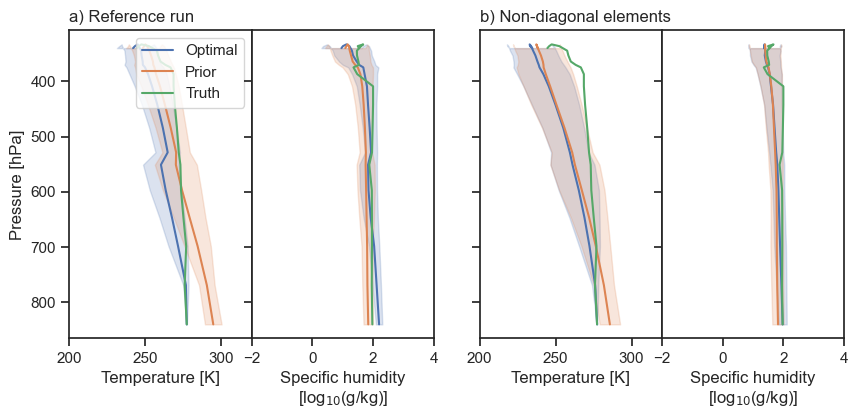

In [189]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_nondiag,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Non-diagonal elements',
    xlimT = (200, 320),
    xlimH = (-2,4),
)

In [190]:
oe_nondiag.dgf - oe_ref.dgf

0.005776827469795354

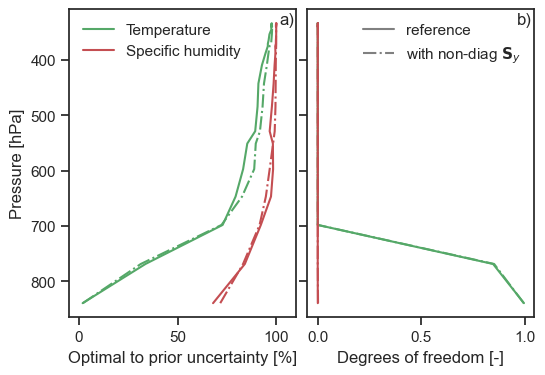

In [191]:
fig = supporting_routines.plot_uncertainty_dof(
    oe_ref, oe_nondiag, 'with non-diag $\mathbf{S}_y$',
    pressure.loc['MAM'] / 100,
)

In [192]:
print(oe_nondiag.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_nondiag.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
Linearity test passed:  True


In [193]:
x_a = x_mean.sel(season='MAM').to_pandas()  # as reference run
S_a = x_cov.sel(season='MAM').to_pandas()   # as reference run

In [194]:
oe_testy = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_y,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
    convergenceTest='y'
)
oe_testy.doRetrieval()

0.21 s, iteration 1, degrees of freedom: 1.90 of 40, not converged (y-space):  37002.026
0.30 s, iteration 2, degrees of freedom: 1.90 of 40, converged (y-space):  0.025


0.40 s, iteration 3, degrees of freedom: 1.90 of 40, done.  0.000


True

In [195]:
oe_testy.dgf, oe_ref.dgf

(1.9003783874640205, 1.8429150366021838)

In [196]:
print('Reference run with test in x-space:')
supporting_routines.print_mwr_rms(oe_ref)
print('Test in y-space:')
supporting_routines.print_mwr_rms(oe_testy)


Reference run with test in x-space:
RMS X Temperature: 10.0859 [K]
RMS X Humidity: 25.5869 [log$_{10}$(g/kg)]
RMS Y 0.0265807 [K]
Test in y-space:
RMS X Temperature: 17.2012 [K]
RMS X Humidity: 24.5763 [log$_{10}$(g/kg)]
RMS Y 0.0026542 [K]


In [197]:
print(oe_testy.chiSquareTest()[0])

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [198]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_testy.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Linearity test passed:  True
